In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import cv2
from tqdm import tqdm
import random
import os

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_train = "/content/drive/MyDrive/Projects/AL-ZHEIME Main-Project/Alzheimer  Dataset/train"
path_test = "/content/drive/MyDrive/Projects/AL-ZHEIME Main-Project/Alzheimer  Dataset/test"

CATEGORIES = ["MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented"]

In [ ]:
def createData(pathto):
  data = []
  for category in tqdm(CATEGORIES):
    path = os.path.join(pathto, category)
    class_num = CATEGORIES.index(category)
    for img in (os.listdir(path)):
      img_array = cv2.imread(os.path.join(path,img))
      data.append([img_array, class_num])
  return data

In [ ]:
training = createData(path_train)

100%|██████████| 4/4 [02:14<00:00, 33.59s/it]


In [ ]:
len(training)

5151

In [ ]:
test = createData(path_test)

100%|██████████| 4/4 [00:12<00:00,  3.20s/it]


In [ ]:
len(test)

1299

In [ ]:
# Shuffle the training data
random.seed(42)
random.shuffle(training)
random.shuffle(test)

# Combine train and test data
combined_data = training + test
random.shuffle(combined_data)

In [ ]:
# Split the data into features and labels
X = []
y = []
for features, label in tqdm(combined_data):
  X.append(features)
  y.append(label)

100%|██████████| 6450/6450 [00:00<00:00, 819572.26it/s]


In [ ]:
# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

In [ ]:
# Normalize the image data
X = X.astype('float32')
X /= 255

In [ ]:
# Perform one-hot encoding on the labels
Y = to_categorical(y, num_classes=4)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
# Define your Alzheimer's classification model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu, input_shape=(208, 176, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train your Alzheimer's classification model
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
162/162 [==============================] - 259s 2s/step - loss: 1.0524 - accuracy: 0.5254 - val_loss: 0.9312 - val_accuracy: 0.5473
Epoch 2/10
162/162 [==============================] - 259s 2s/step - loss: 0.7811 - accuracy: 0.6514 - val_loss: 0.7203 - val_accuracy: 0.6628
Epoch 3/10
162/162 [==============================] - 267s 2s/step - loss: 0.5577 - accuracy: 0.7614 - val_loss: 0.4173 - val_accuracy: 0.8364
Epoch 4/10
162/162 [==============================] - 259s 2s/step - loss: 0.3625 - accuracy: 0.8539 - val_loss: 0.2515 - val_accuracy: 0.9233
Epoch 5/10
162/162 [==============================] - 257s 2s/step - loss: 0.2833 - accuracy: 0.8938 - val_loss: 0.2800 - val_accuracy: 0.8806
Epoch 6/10
162/162 [==============================] - 262s 2s/step - loss: 0.1954 - accuracy: 0.9250 - val_loss: 0.1535 - val_accuracy: 0.9566
Epoch 7/10
162/162 [==============================] - 258s 2s/step - loss: 0.1691 - accuracy: 0.9333 - val_loss: 0.1108 - val_accuracy: 0.9705

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 208, 176, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 104, 88, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 104, 88, 32)       9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 52, 44, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 52, 44, 32)        0         
                                                                 
 flatten (Flatten)           (None, 73216)             0

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 1 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

41/41 [==============================] - 21s 498ms/step - loss: 0.0607 - accuracy: 0.9860
Test Score:  0.06072097271680832
Test accuracy:  0.9860464930534363


In [ ]:
# Predict classes on training set
y_train_pred = model.predict(X_train)
# Convert predicted probabilities to class labels
y_train_pred_classes = np.argmax(y_train_pred, axis=1)

# Calculate classification report
# Calculate classification report
training_report = classification_report(y_train, y_train_pred_classes, target_names=CATEGORIES)

# Print classification report
print("Training Classification Report:")
print(training_report)

162/162 [==============================] - 70s 426ms/step
Training Classification Report:
                  precision    recall  f1-score   support

    MildDemented       1.00      1.00      1.00       707
ModerateDemented       1.00      1.00      1.00        49
     NonDemented       1.00      1.00      1.00      2609
VeryMildDemented       1.00      1.00      1.00      1795

        accuracy                           1.00      5160
       macro avg       1.00      1.00      1.00      5160
    weighted avg       1.00      1.00      1.00      5160



In [ ]:
# Evaluate model on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, F1-score
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

41/41 [==============================] - 25s 572ms/step
Precision: 0.99
Recall: 0.99
F1-score: 0.99


In [ ]:
#  Generate classification report
report = classification_report(y_test, y_pred_classes, target_names=CATEGORIES)

# Print classification report
print("Test Classification Report:")
print(report)

Test Classification Report:
                  precision    recall  f1-score   support

    MildDemented       1.00      0.96      0.98       189
ModerateDemented       1.00      1.00      1.00        15
     NonDemented       0.99      0.99      0.99       631
VeryMildDemented       0.97      0.99      0.98       455

        accuracy                           0.99      1290
       macro avg       0.99      0.99      0.99      1290
    weighted avg       0.99      0.99      0.99      1290



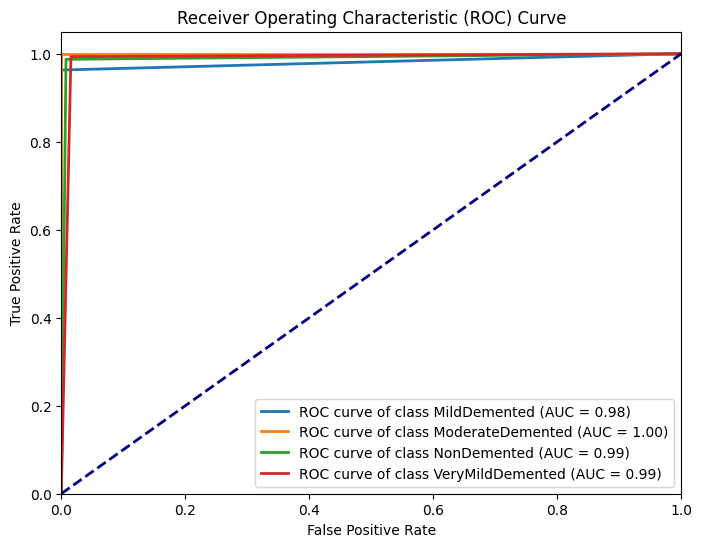

In [ ]:
# Reshape y_test and y_pred to be 2-dimensional arrays
y_test_2d = np.array([[(1 if j == y else 0) for j in range(len(CATEGORIES))] for y in y_test])
y_pred_2d = np.array([[(1 if j == y else 0) for j in range(len(CATEGORIES))] for y in y_pred_classes])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(CATEGORIES)):
    fpr[i], tpr[i], _ = roc_curve(y_test_2d[:, i], y_pred_2d[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(CATEGORIES)):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {} (AUC = {:.2f})'.format(CATEGORIES[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

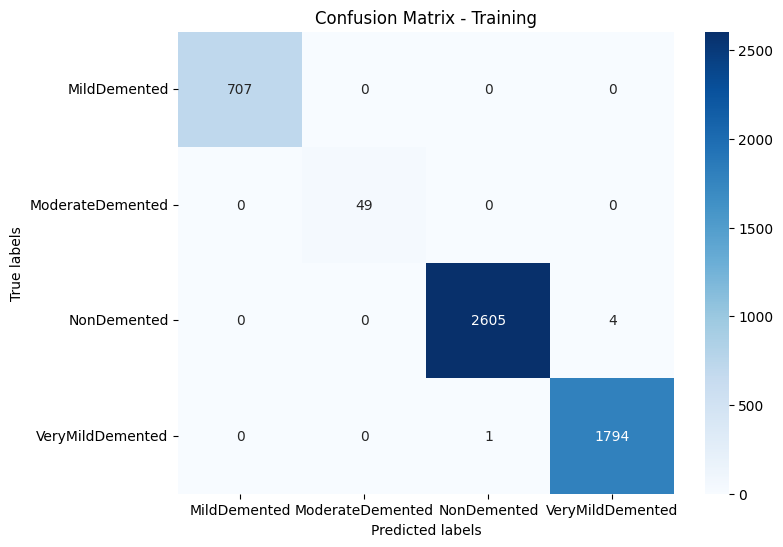

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented"], yticklabels=["MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Training')
plt.show()

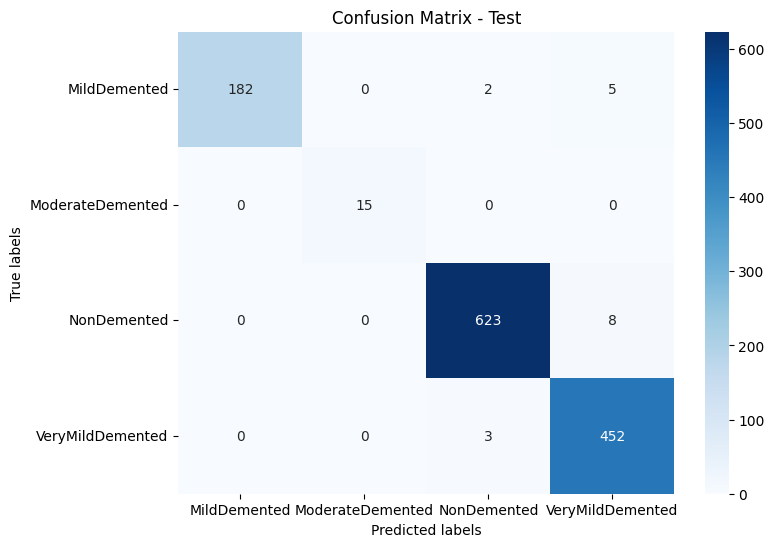

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented"], yticklabels=["MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test')
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/Projects/AL-ZHEIME Main-Project/XAIModels/AD_XAI")

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Projects/AL-ZHEIME Main-Project/XAIModels/AD_XAI')

In [ ]:
!pip install lime
!pip install tensorflow-addons

In [ ]:
import tensorflow_addons as tfa
from lime import lime_image
from skimage.segmentation import mark_boundaries

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
explainer = lime_image.LimeImageExplainer()

In [ ]:
def grad_cam(model, image, class_index, layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = predictions[:, class_index]

    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]

    guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

    weights = tf.reduce_mean(guided_grads, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, output), axis=-1)
    cam = np.maximum(cam, 0)

    return cam

In [ ]:
# Function to get the last convolutional layer
def get_last_conv_layer(model):
    for layer in reversed(model.layers):
        if 'conv' in layer.name:
            return layer.name
    raise ValueError("No convolutional layer found in the model.")

In [ ]:
# Get the last convolutional layer
last_conv_layer = get_last_conv_layer(model)

In [ ]:
def generate_lime_explanation(model, image, class_index):
    explanation = explainer.explain_instance(image[0].astype('double'), model.predict, top_labels=1, hide_color=0, num_samples=1000)
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
    return mark_boundaries(temp / 2 + 0.5, mask)

In [ ]:
# Choose the index of the image to explain
image_index = int(input("Enter the index : "))

Enter the index : 5


In [ ]:
image = X_test[image_index:image_index+1]

# Generate Lime explanation
lime_explanation = generate_lime_explanation(model, image, y_test[image_index])

# Generate Grad-CAM
class_labels = ["MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented"]
class_index = np.argmax(model.predict(image))
predicted_class = class_labels[np.argmax(model.predict(image))]
grad_cam_result = grad_cam(model, image, class_index, last_conv_layer)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 53ms/step


In [ ]:
print(class_index)
print(predicted_class)

3
VeryMildDemented


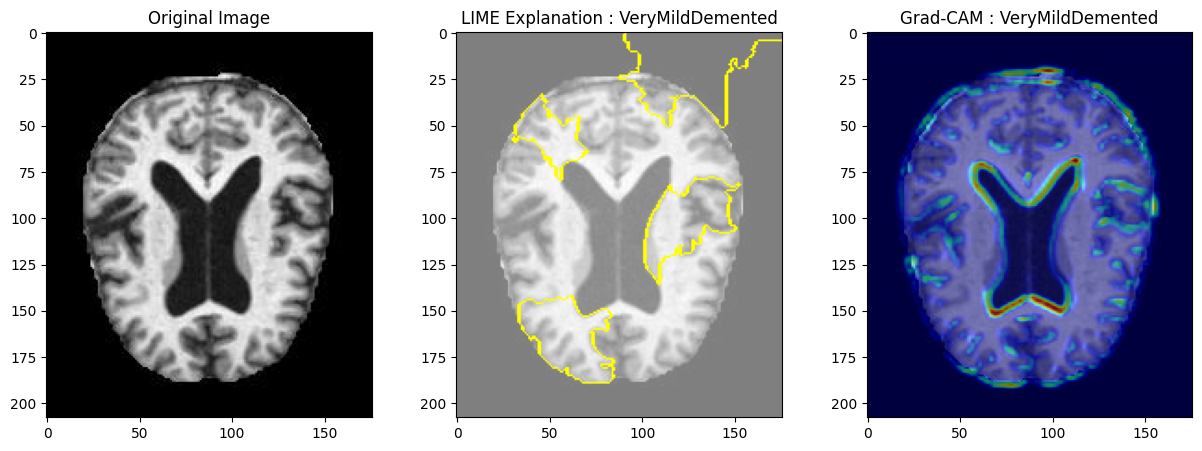

In [ ]:
# Plot results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image[0])
ax[0].set_title('Original Image')

ax[1].imshow(lime_explanation)
ax[1].set_title(f'LIME Explanation : {predicted_class}')

ax[2].imshow(image[0])
ax[2].imshow(cv2.resize(grad_cam_result, (image.shape[2], image.shape[1])),alpha=0.5, cmap='jet')
ax[2].set_title(f'Grad-CAM : {predicted_class}')

plt.show()